## Plot Spark and Kafka startup times

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('rp-streaming_startup.csv', skipinitialspace=True)

In [5]:
data = data.sort_values(by='nodes')
data.head()

,Spark download,Spark startup,kafka download,kafka startup,nodes,system
0,11.170882,18.045621,2.795463,4.873807,2,stampede
5,15.820045,18.612472,3.654392,4.343405,2,stampede
6,13.556084,18.642828,2.853874,3.550541,2,stampede
2,10.716899,18.286344,2.688339,9.395238,4,stampede
7,13.494833,18.164538,2.729607,10.442769,4,stampede


### Plot on Stampede 

In [6]:
stampede_data = data[(data.system== 'stampede')]
stampede_data_mean = stampede_data.groupby(['nodes']).mean()
#data.groupby(['nodes']).std()
stampede_data_mean
#stampede_data.groupby(['nodes']).std()

,Spark download,Spark startup,kafka download,kafka startup
nodes,,,,
2,13.515670,18.433640,3.101243,4.255918
4,11.360420,18.315861,2.674749,10.370816
8,10.703971,18.158908,2.624137,17.976975
16,21.705419,21.787253,2.566247,26.012612


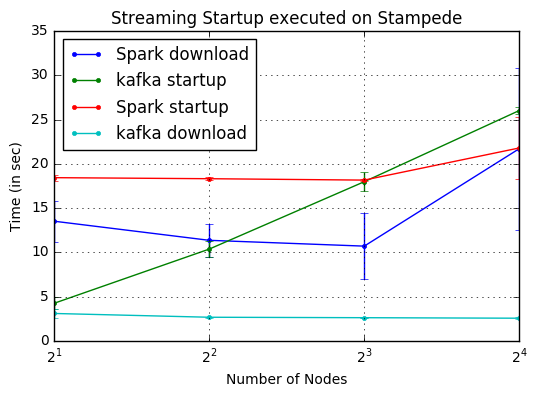

In [8]:
ax = stampede_data_mean.plot(y=['Spark download','kafka startup','Spark startup','kafka download'], 
                      title='Streaming Startup executed on Stampede', 
                      #legend=None,
                      #xlim=(0,16),
                      #xticks = [0,1,2,3,4,5,6,7,8,16],
                      #ylim=(0,12),
                      marker='.',
                      yerr= stampede_data.groupby(['nodes']).std()
                      )
ax.set_xscale('log', basex=2)
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Time (in sec)")
#ax.annotate('Spark Download', xy=(2, 1), xytext=(2, 11),)

#ax.annotate('Kafka Download', xy=(2, 1), xytext=(2, 4),)
#ax.annotate('Spark Startup', xy=(2, 1), xytext=(2, 21),)
#ax.annotate('Kafka Startup', xy=(2, 1), xytext=(2, 1),)

ax.grid()
plt.show()
#plt.savefig('rp-streaming_startup.pdf')

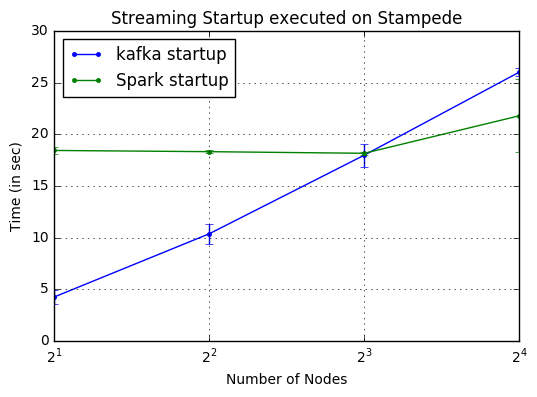

In [10]:
ax = stampede_data_mean.plot(y=['kafka startup','Spark startup'], 
                      title='Streaming Startup executed on Stampede', 
                      #legend=None,
                      #xlim=(0,16),
                      #xticks = [0,1,2,3,4,5,6,7,8,16],
                      #ylim=(0,12),
                      marker='.',
                      yerr= stampede_data.groupby(['nodes']).std()
                      )
ax.set_xscale('log', basex=2)
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Time (in sec)")
#ax.annotate('Spark Download', xy=(2, 1), xytext=(2, 11),)

#ax.annotate('Kafka Download', xy=(2, 1), xytext=(2, 4),)
#ax.annotate('Spark Startup', xy=(2, 1), xytext=(2, 21),)
#ax.annotate('Kafka Startup', xy=(2, 1), xytext=(2, 1),)

ax.grid()
plt.show()
#plt.savefig('rp-streaming_startup.pdf')

### Plot on Comet 

In [21]:
comet_data = data[(data.system== 'comet')]
comet_data_mean = comet_data.groupby(['nodes']).mean()
#data.groupby(['nodes']).std()
comet_data_mean
comet_data.groupby(['nodes']).std()

,Spark download,Spark startup,kafka download,kafka startup
nodes,,,,
2,3.448167,0.007126,0.024307,0.004074
4,0.837816,0.019428,0.365395,0.004863
8,2.845063,0.295520,0.084856,0.005583
16,7.718341,0.275699,0.193742,0.016769


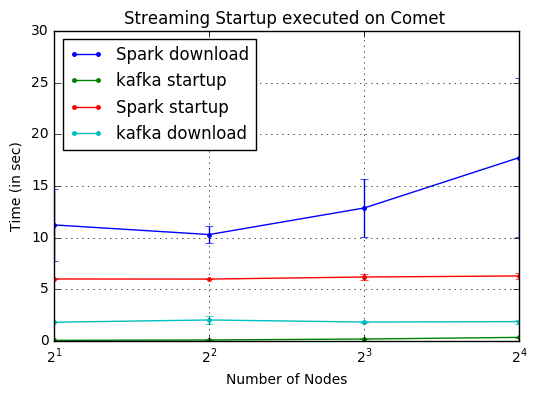

In [23]:
ax = comet_data_mean.plot(y=['Spark download','kafka startup','Spark startup','kafka download'], 
                      title='Streaming Startup executed on Comet ', 
                      #legend=None,
                      #xlim=(0,16),
                      xticks = [2,4,8,16],
                      #ylim=(0,12),
                      marker='.',
                      yerr= comet_data.groupby(['nodes']).std()
                      )
ax.set_xscale('log', basex=2)
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Time (in sec)")
#ax.annotate('Spark Download', xy=(2, 1), xytext=(2, 11),)
#ax.annotate('Kafka Download', xy=(2, 1), xytext=(2, 4),)
#ax.annotate('Spark Startup', xy=(2, 1), xytext=(2, 17),)

#ax.annotate('Kafka Startup', xy=(2, 1), xytext=(2, 1),)
ax.grid()
plt.show()

### Plot on Wrangler

In [25]:
wrangler_data = data[(data.system== 'wrangler')]
wrangler_data_mean = wrangler_data.groupby(['nodes']).mean()
wrangler_data_mean
#wrangler_data.groupby(['nodes']).std()
#wrangler_data

,Spark download,Spark startup,kafka download,kafka startup
nodes,,,,
2,10.096653,6.473950,1.930973,0.078095
4,6.700355,11.986043,1.767754,0.088012
8,5.766068,11.939267,1.639437,0.129926


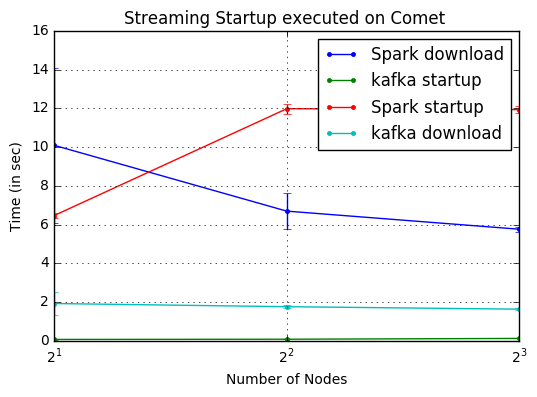

In [26]:
ax = wrangler_data_mean.plot(y=['Spark download','kafka startup','Spark startup','kafka download'], 
                      title='Streaming Startup executed on Comet ', 
                      #legend=None,
                      #xlim=(0,16),
                      #xticks = [0,1,2,3,4,5,6,7,8,16],
                      #ylim=(0,12),
                      marker='.',
                      yerr= wrangler_data.groupby(['nodes']).std()
                      )
ax.set_xscale('log', basex=2)
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Time (in sec)")
#ax.annotate('Spark Download', xy=(2, 1), xytext=(2, 11),)
#ax.annotate('Kafka Download', xy=(2, 1), xytext=(2, 4),)
#ax.annotate('Spark Startup', xy=(2, 1), xytext=(2, 17),)

#ax.annotate('Kafka Startup', xy=(2, 1), xytext=(2, 1),)
ax.grid()
plt.show()